# Preparing Chess Data

In this notebook we will prepare the data used as an input for the neural network in the following notebook. For this purpose, we will use the dataset from the [Kaggle](https://www.kaggle.com/) platform, which is available [here](https://www.kaggle.com/datasets/timhanewich/5-million-chess-game-results-november-2019/data). This dataset contains 5 million chess games and their details.

To start, we will first import the necessary libraries.

In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

For our task, we will only need player names, their ratings and outcomes of the games, hence, not all data will be used. Additionally, we will not use data of all of the games, since even the substancially lower number of games will suffice.

In [7]:
limit = 500000

data = pd.read_csv('chess games/November2019.csv', usecols = ['White', 'Black', 'Result', 'WhiteElo', 'BlackElo'], nrows = limit)

In [8]:
data.head()

,White,Black,Result,WhiteElo,BlackElo
0,e_0shams0,foxfless,1-0,1504,1505
1,Andrej1909,ewafx,0-1,1487,1485
2,Lassandra,Kaival145,1-0,1516,1523
3,Ayowole,vallar_morghullis,0-1,1682,1666
4,sochparov,HishamElalawy,1-0,1765,1766


Next, for every player, we will make a list of his games, where we will store the ELO rating of his oponent and the outcome of the match. The elements of the list will be of the form *(opp_rtg, c)*, where *opp_rtg* will be the opponent rating, and *c* will be a number indicating the outcome. In particular, we will have *c=1* if the player had won the game, *c=-1* if he had lost, and *c=0* if the game was a draw.

In [12]:
player_ids = {}
player_count = 0
elos = []
matches = []
player_names = []

In [14]:
for i in range(len(data)):
    elo1 = int(data.iloc[i,3])
    name1 = data.iloc[i,0]
    elo2 = int(data.iloc[i,4])
    name2 = data.iloc[i,1]
    outcome = data.iloc[i,2]

    for name_elo in [(name1, elo1), (name2, elo2)]:
        if player_ids.get(name_elo[0]) == None:
            player_ids[name_elo[0]] = player_count
            matches.append([])
            elos.append(name_elo[1])
            player_names.append(name_elo[0])
            player_count += 1
            
    id1 = player_ids[name1]
    id2 = player_ids[name2]
    if outcome == '1-0':
        matches[id1].append((elo2,1))
        matches[id2].append((elo1,-1))
    elif outcome == '0-1':
        matches[id1].append((elo2,-1))
        matches[id2].append((elo1,1))
    else:
        matches[id1].append((elo2,0))
        matches[id2].append((elo1,0))

In [16]:
print('Number of players is ', player_count)

Number of players is  157383


We can see that it is now very easy to navigate through data. For example:

In [19]:
id = 10

print('Player name: ', player_names[id])
print('Player rating: ', elos[id])
print('Games played:')
print(matches[id])

Player name:  Cliff86
Player rating:  1531
Games played:
[(1526, -1), (1347, 1), (1522, -1), (1229, -1), (1647, -1), (1297, -1)]


Additionally, we can obtain more information on number of games played by one player.

In [22]:
max_matches = 0
id_max = -1

for i in range(player_count):
    if max_matches < len(matches[i]):
        max_matches = len(matches[i])
        id_max = i

print('Player with maximum number of games played: ', player_names[id_max])
print('Number of games played: ', max_matches)

Player with maximum number of games played:  Burrower
Number of games played:  336


Let us now compute how many players played certain amount of games:

In [25]:
num_games = (max_matches+1)*[0]

for i in range(player_count):
    num_games[len(matches[i])] += 1

print(num_games[1:])

[37789, 25236, 18159, 13452, 10046, 8112, 6404, 5126, 4246, 3656, 2944, 2527, 2144, 1873, 1622, 1399, 1180, 1086, 980, 855, 698, 687, 573, 518, 488, 429, 398, 337, 336, 294, 242, 226, 228, 207, 185, 167, 129, 136, 150, 125, 92, 115, 119, 81, 71, 73, 75, 70, 58, 56, 69, 43, 46, 46, 54, 42, 51, 34, 42, 32, 33, 35, 28, 27, 24, 20, 26, 27, 24, 17, 15, 25, 14, 16, 17, 21, 13, 9, 13, 16, 13, 8, 7, 12, 6, 14, 6, 13, 7, 7, 4, 8, 7, 10, 2, 9, 6, 6, 5, 5, 5, 7, 2, 4, 5, 4, 1, 1, 6, 5, 5, 2, 3, 5, 3, 2, 2, 3, 3, 4, 1, 3, 0, 5, 0, 0, 5, 2, 1, 3, 0, 1, 2, 2, 0, 1, 1, 4, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [27]:
print('Number of players that played 10 games is: ', num_games[10])

Number of players that played 10 games is:  3656


Let us see this graphically:

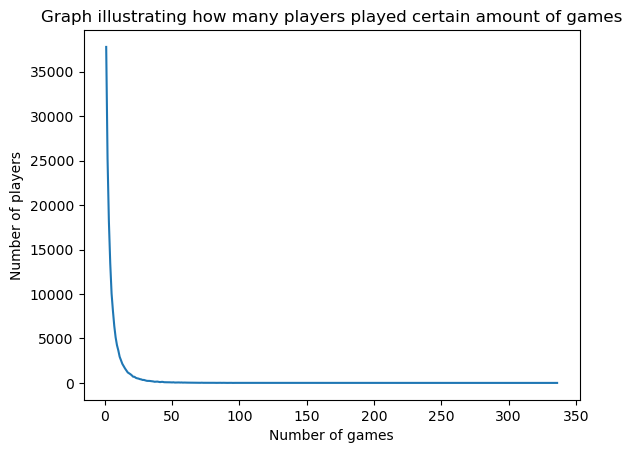

In [30]:
plt.title('Graph illustrating how many players played certain amount of games')
plt.plot(np.arange(1, max_matches+1), np.array(num_games[1:]))
plt.xlabel('Number of games')
plt.ylabel('Number of players')
plt.show()

As we can see, a lot of players played relatively small amount of games. What we are now interested in is how many players played at least certain amount of games.

In [33]:
def at_least_games_played( limit ):
    s = 0
    for i in range(limit, max_matches+1):
        s += num_games[i]
    return s

In [35]:
print('Number of players that played at least 10 games is ',at_least_games_played( 10 ))
print('Number of players that played at least 15 games is ',at_least_games_played( 15 ))
print('Number of players that played at least 20 games is ',at_least_games_played( 20 ))

Number of players that played at least 10 games is  28813
Number of players that played at least 15 games is  15669
Number of players that played at least 20 games is  9402


Numbers of players that played at least 10, 15 or 20 games are relatively high and do represent a sufficient dadaset to train our neural network on. The discusion on what the final number of minimal games played will be will follow in the next notebook.

## Saving Data

What is left to do is to store the produced data in order to be used in the following notebook.

In [40]:
with open("ChessData.aca","wb") as f:
    pickle.dump(player_count, f)
    pickle.dump(player_names, f)
    pickle.dump(player_ids, f)
    pickle.dump(matches, f)
    pickle.dump(elos, f)